 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.

In [1]:
import skimage
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

#cat이미지
cat = data.chelsea()

def convolve(image, kernel, scale=1):
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	pad = (kW - 1)//2
	output = np.zeros((iH-2*pad, iW-2*pad), dtype="float32")

	# loop over the input image, "sliding" the kernel across each (x, y)-coordinate from left-to-right and top to bottom
	for y in np.arange(pad, iH - pad):
		for x in np.arange(pad, iW - pad):
			roi = image[y-pad:y+pad+1, x-pad:x+pad+1]
			output[y-pad, x-pad] = (roi * kernel).sum()*scale
			
	# rescale the output image to be in the range [0, 255]
	#output = rescale_intensity(output, in_range=(0, 255))
	#output = (output * 255).astype("uint8")
 
	# return the output image
	return output

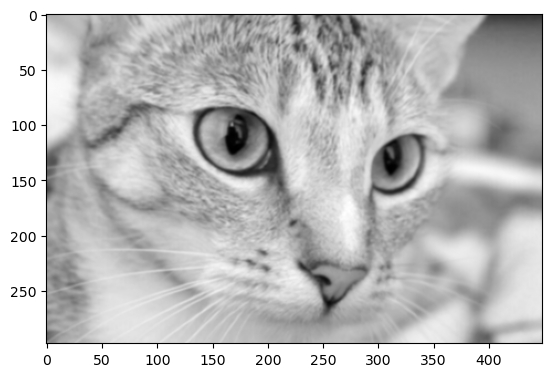

In [9]:
#3x3gaussian_filter
gaussian_filter3x3 = np.array([[1,2,1],
                               [2,4,2],
                               [1,2,1]])

# 필터 가중치 합이 1이 되도록 정규화
gaussian_filter3x3 = gaussian_filter3x3 / np.sum(gaussian_filter3x3)
gaussian_filtered1 = convolve(cat[:,:,0], gaussian_filter3x3)

#흑백으로 출력
plt.imshow(gaussian_filtered1,cmap='gray')

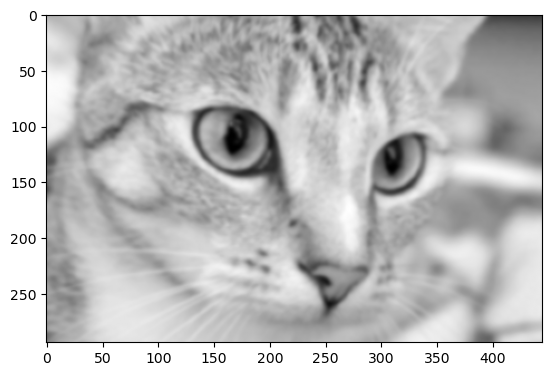

In [3]:
#7x7 gaussian_filter
gaussian_filter7x7 = np.array([
    [1,  1,  2,  3,  2,  1,  1],
    [1,  3,  5,  6,  5,  3,  1],
    [2,  5,  9, 12,  9,  5,  2],
    [3,  6, 12, 15, 12,  6,  3],
    [2,  5,  9, 12,  9,  5,  2],
    [1,  3,  5,  6,  5,  3,  1],
    [1,  1,  2,  3,  2,  1,  1]
])

gaussian_filter7x7 = gaussian_filter7x7 / np.sum(gaussian_filter7x7)
gaussian_filtered2 = convolve(cat[:,:,0], gaussian_filter7x7)
plt.imshow(gaussian_filtered2, cmap='gray')

gaussian filter는 이미지의 노이즈를 줄여 부드럽게 만드는데 사용되는데 필터의 크기가 커질수록 smoothing의 효과가 커져 더 부드러워 보인다.

 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, a)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요. 두 가지 경우의 차이점을 설명하세요.

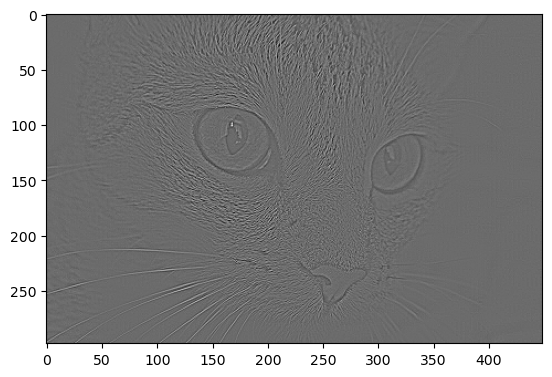

In [4]:
#3x3 laplacian filter
Laplacian_filter = np.array([[0, -1, 0],
                            [-1, 4, -1],
                            [0, -1, 0]])

filtered2 = convolve(cat[:,:,0], Laplacian_filter)
plt.imshow(filtered2, cmap=plt.cm.gray)

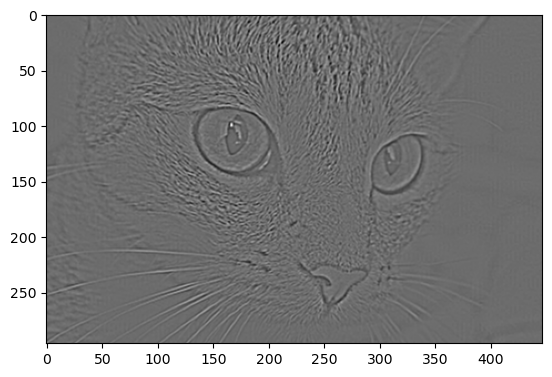

In [5]:
#a에서 smoothing된 이미지에 gaussian filter 적용
filtered3 = convolve(gaussian_filtered1, Laplacian_filter)
plt.imshow(filtered3, cmap=plt.cm.gray)

laplacian필터는 이미지의 윤곽선을 검출하는데 사용 되는데 gaussian smoothing을 적용한 이미지에 laplacian필터를 적용하면 노이즈가 줄어 더 깔끔한 엣지를 검출할 수 있다.